In [1]:
# Import required libraries

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [2]:
# Import data

data = pd.read_csv("Fish.csv")

In [3]:
# Information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
# Check is there is any missing data

data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
# Summary statistics

data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


 There is only one categorical variable which is "Species".
 We can see the number of occurrences of each category.

In [7]:
data["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

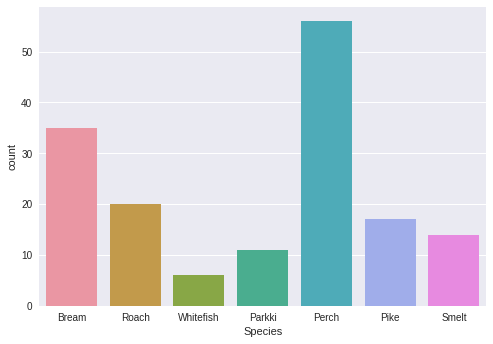

In [8]:
sns.countplot("Species", data=data)

 We can see that Perch is the most common one and Whitefish is the least.

 Let's group the data by Species and calculate the mean values of each continuous variable.

In [9]:
grp = data.groupby("Species").mean()
grp

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
Parkki,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736
Perch,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
Pike,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382
Roach,152.050000,20.645000,22.275000,24.970000,6.694795,3.657850
Smelt,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
Whitefish,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050


Text(0.5, 1.0, 'Mean Weight of Species')

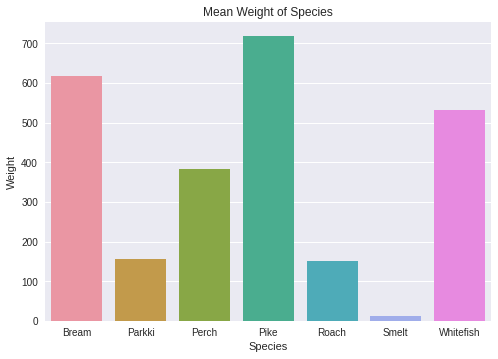

In [10]:
# Barplot for mean weight of species

sns.barplot(grp.index, "Weight", data=grp)
plt.title("Mean Weight of Species")

 According to our barplot, Pike has the highest mean weight whereas Smelt has the lowest.

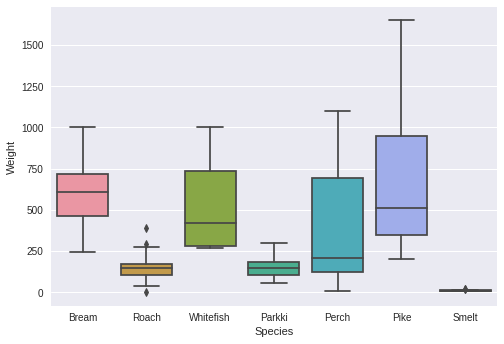

In [11]:
# Box plot for weight of species

sns.boxplot("Species", "Weight", data=data)

 Let's calculate the correlation for continuous variables and plot a heatmap for visualization. By this way, we can see how strong the association between the variables.

Text(0.5, 1.0, 'Correlation Heatmap')

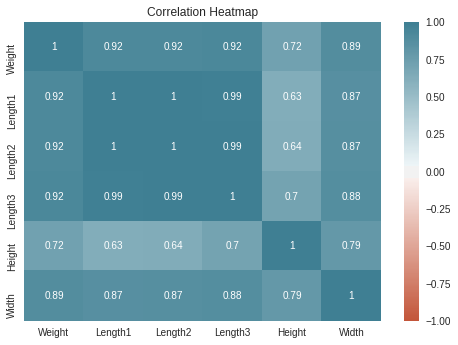

In [12]:
# Calculate correlation and store it
corr = data.corr()
# Color palette for heatmap
cmap = sns.diverging_palette(20, 220, as_cmap=True)
sns.heatmap(corr, vmin=-1, vmax=1, cmap=cmap, annot=True)
plt.title("Correlation Heatmap")

 Heatmap shows us that variables have high correlation coefficients.
 
 "Weight" and "Length1": 0.92,
 "Weight" and "Length2": 0.92,
 "Weight" and "Length3": 0.92,
 "Weight" and "Height": 0.72,
 "Weight" and "Width": 0.89

In [13]:
# Detect outliers


def outliers(data):
    """
    Plot a boxplot and return outliers of the given data
    """
    # plot data
    sns.boxplot(data)

    # find outliers
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    if len(outliers) != 0:
        return outliers
    return "No outliers found"



142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

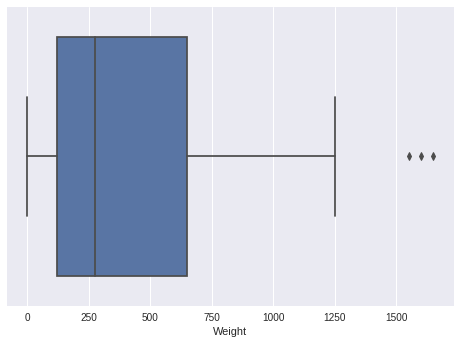

In [14]:
outliers(data["Weight"])

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

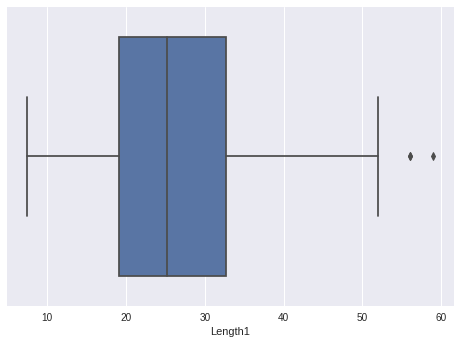

In [15]:
outliers(data["Length1"])

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

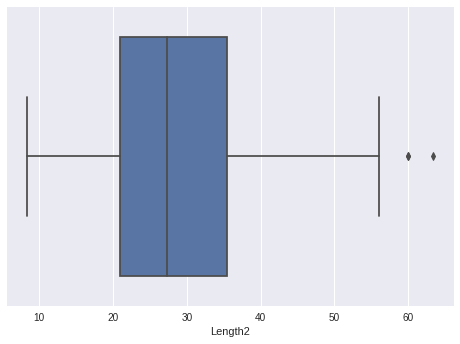

In [16]:
outliers(data["Length2"])

144    68.0
Name: Length3, dtype: float64

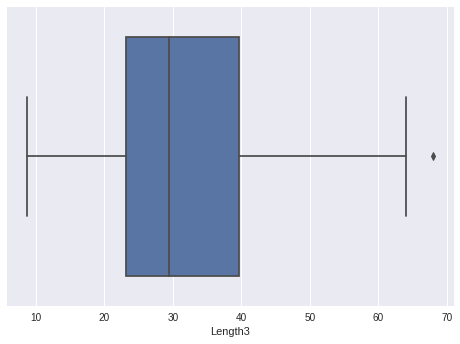

In [17]:
outliers(data["Length3"])

'No outliers found'

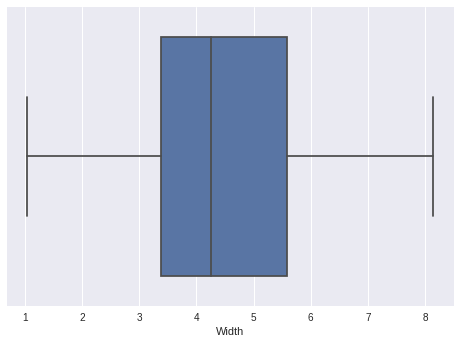

In [18]:
outliers(data["Width"])

 Index number 142,143,144 are outliers.
 We can remove those entries.

In [19]:
# Drop outliers

data.drop([142, 143, 144], inplace=True)

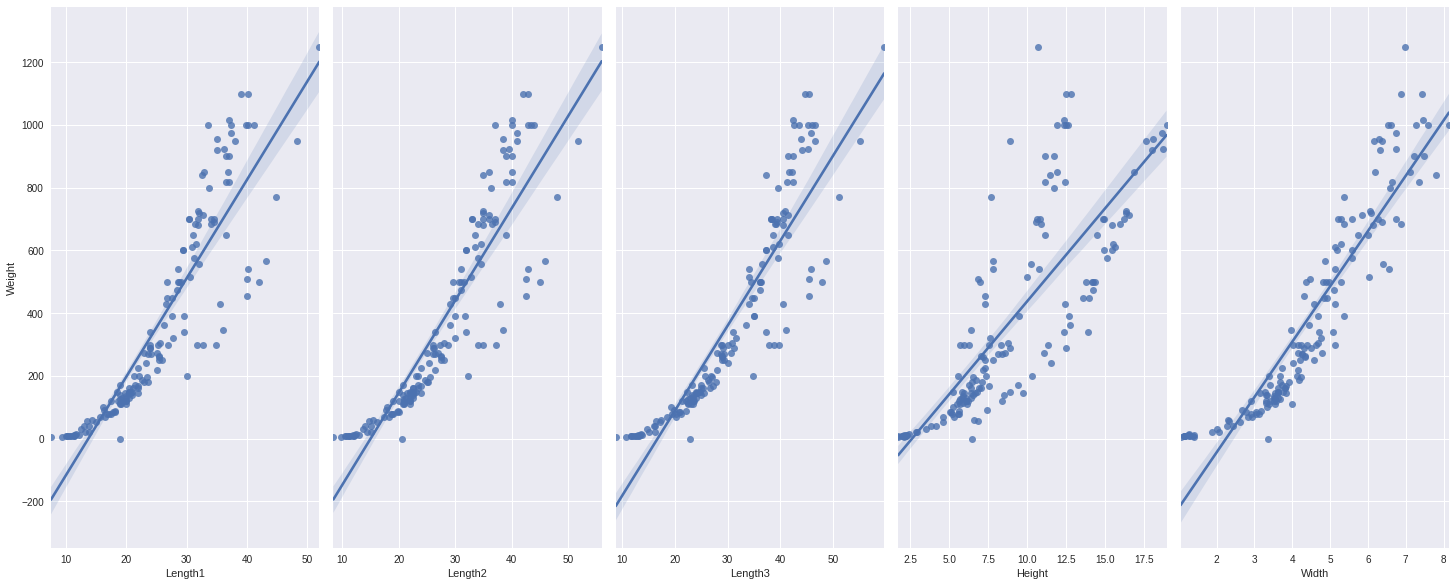

In [20]:
# Plot linear relationship of each variable with Weight

sns.pairplot(data=data, x_vars=["Length1", "Length2", "Length3", "Height", "Width"], y_vars=[
             "Weight"], kind="reg", height=8, aspect=.5)

 The results above suggest that variables have linear relationship with Weight.

In [21]:
# Split the data into train and test data
x = data[["Length1", "Length2", "Length3", "Height", "Width"]]
y = data["Weight"]

X_train, X_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.2)


 ## Linear Regression

In [22]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)
y_hat = lin_reg.predict(X_test)


In [23]:
# Calculate R-Squared and Mean Squared Error

print(f"R-Squared: {r2_score(y_test, y_hat)}")
print(f"MSE: {mean_squared_error(y_test, y_hat)}")

R-Squared: 0.9168025741580008
MSE: 7838.981939855566


 ## Polynomial Regression (Degree = 2)

In [24]:
Input = [('polynomial', PolynomialFeatures(degree=2)),
         ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X_train, y_train)
y_hat_pipe = pipe.predict(X_test)

In [25]:
# Calculate R-Squared and Mean Squared Error

print(f"R-Squared: {r2_score(y_test, y_hat_pipe)}")
print(f"MSE: {mean_squared_error(y_test, y_hat_pipe)}")

R-Squared: 0.9653660833845066
MSE: 3263.2577763994027


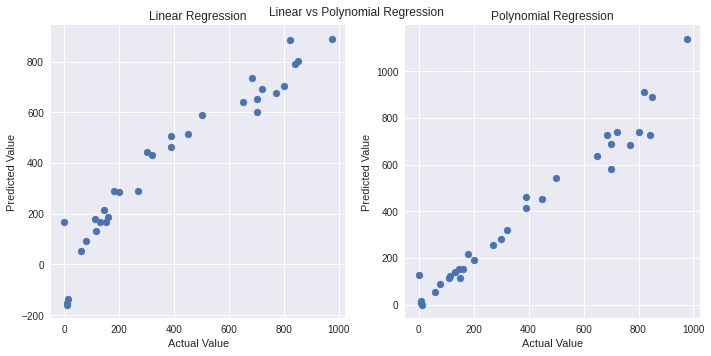

In [26]:
# Scatterplot for linear regression
plt.figure(figsize=(10, 5))
plt.subplot("121")
plt.scatter(y_test, y_hat)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Linear Regression")
# Scatterplot for polynomial regression
plt.subplot("122")
plt.scatter(y_test, y_hat_pipe)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Polynomial Regression")

plt.suptitle("Linear vs Polynomial Regression")
plt.tight_layout()

 We can look at the distribution of the fitted values and compare it to the distribution of the actual values.

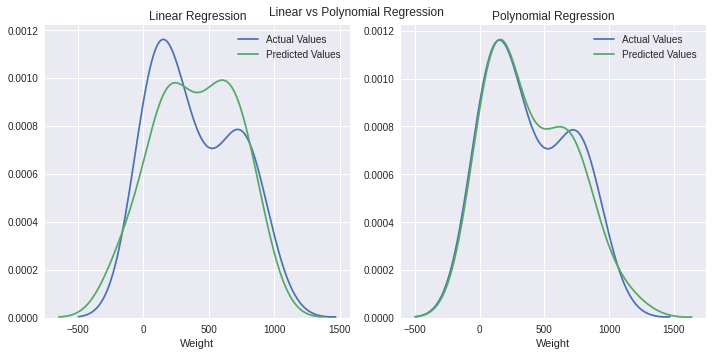

In [27]:
# Create a distribution plot
# Distribution plot for linear regression
plt.figure(figsize=(10, 5))
plt.subplot("121")
sns.distplot(y_test, hist=False, label="Actual Values")
sns.distplot(y_hat, hist=False, label="Predicted Values")
plt.title("Linear Regression")
# Distribution plot for polynomial regression
plt.subplot("122")
sns.distplot(y_test, hist=False, label="Actual Values")
sns.distplot(y_hat_pipe, hist=False, label="Predicted Values")
plt.title("Polynomial Regression")

plt.suptitle("Linear vs Polynomial Regression")
plt.tight_layout()

 The last two visualizations suggest that polynomial regression model is able to predict more accurately compared to linear regression model.
 
 R-Squared value that we calculated from polynomial regression model is higher than the R-Squared value from linear regression model.

 $R^2: 0.9168025741580008$ (linear regression)

 $R^2: 0.9653660833845066$ (polynomial regression)

 In addition, MSE value from polynomial regression model is lower compared to MSE value from linear regression model.
 
 $MSE: 7838.981939855566$ (linear regression)
 
 $MSE: 3263.2577763994027$ (polynomial regression)